<a href="https://colab.research.google.com/github/ibnunisvar/100-Days-of-JavaScript-Code/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set_style('dark')
warnings.filterwarnings('ignore')


Data Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   gender                       object
 1   race/ethnicity               object
 2   parental level of education  object
 3   lunch                        object
 4   test preparation course      object
 5   math score                   int64 
 6   reading score                int64 
 7   writing score                int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Select a random sample of indices
num_nulls = 50  # Number of null values to introduce
random_indices = np.random.choice(df.index, size=num_nulls,
                                  replace=False)

# Introduce null values in the 'math score' column
df.loc[random_indices, 'math score'] = np.nan

# Check for null values
print(df.isnull().sum())




gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     50
reading score                   0
writing score                   0
dtype: int64


In [ ]:
# Calculate the mean of math, reading, and writing scores
math_mean = df['math score'].mean()

print(math_mean)


# Calculate the range of math, reading, and writing scores
math_range = df['math score'].max() - df['math score'].min()
reading_range = df['reading score'].max() - df['reading score'].min()
writing_range = df['writing score'].max() - df['writing score'].min()

# Print the results
print(f"Math Score - Mean: {math_mean:.2f}, Range: {math_range:.2f}")
print(f"Reading Score - Mean: {reading_mean:.2f}, Range: {reading_range:.2f}")
print(f"Writing Score - Mean: {writing_mean:.2f}, Range: {writing_range:.2f}")


Math Score - Mean: 66.15, Range: 100.00
Reading Score - Mean: 69.17, Range: 83.00
Writing Score - Mean: 68.05, Range: 90.00


In [ ]:
df.describe()

,math score,reading score,writing score
count,950.000000,1000.000000,1000.000000
mean,66.149474,69.169000,68.054000
std,15.247753,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
# Fill null values with the mean of the column
df['math score'].fillna(df['math score'].mean(), inplace=True)

# Verify that null values are filled
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Display categorical variables with their values
for col in df.select_dtypes(include=['object']).columns:
  print(f'{col}: {df[col].unique()}')


gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']


##Feature encoding



*   Categorical variables are non-numeric features such as gender, country, or product type. These features need to be converted into numbers because most machine learning algorithms (e.g., linear regression, decision trees, neural networks) cannot work directly with text or categories.
*   For ordinal data (like education level), using Label Encoding can preserve this order and lead to better predictions.
* Improper encoding (like using arbitrary numbers for categories) can lead to biased results. For example, assigning 1 for “low” and 3 for “high” in a feature might make a model think that “high” is three times as important as “low.” In this case, an alternative encoding like One-Hot Encoding (without order) may be more appropriate.

* Common Encoding Techniques
  	•	One-Hot Encoding: Converts categories into binary columns (1 or 0). Useful for nominal (unordered) categories.
	  •	Label Encoding: Assigns an integer value to each category. Suitable for ordinal data.
	  •	Target Encoding: Replaces categories with the mean of the target variable. Used for high-cardinality data.
	  •	Frequency Encoding: Encodes categories based on their frequency in the dataset.



In [ ]:
df['gender'] = df['gender'].map({'male':1, 'female':0})

df['race/ethnicity'] = df['race/ethnicity'].map(
                            {"group A":0,
                             "group B":1,
                             "group C":2,
                             "group D":3,
                             "group E":4})

df['parental level of education'] = df['parental level of education'].map(
                                       {'some high school': 0,
                                        'high school': 1,
                                        'some college': 2,
                                        'associate\'s degree': 3,
                                        'bachelor\'s degree': 4,
                                        'master\'s degree': 5})

df['lunch'] = df['lunch'].map({'standard':1, 'free/reduced':0})

df['test preparation course'] = df['test preparation course'].map({'none':0, 'completed':1})

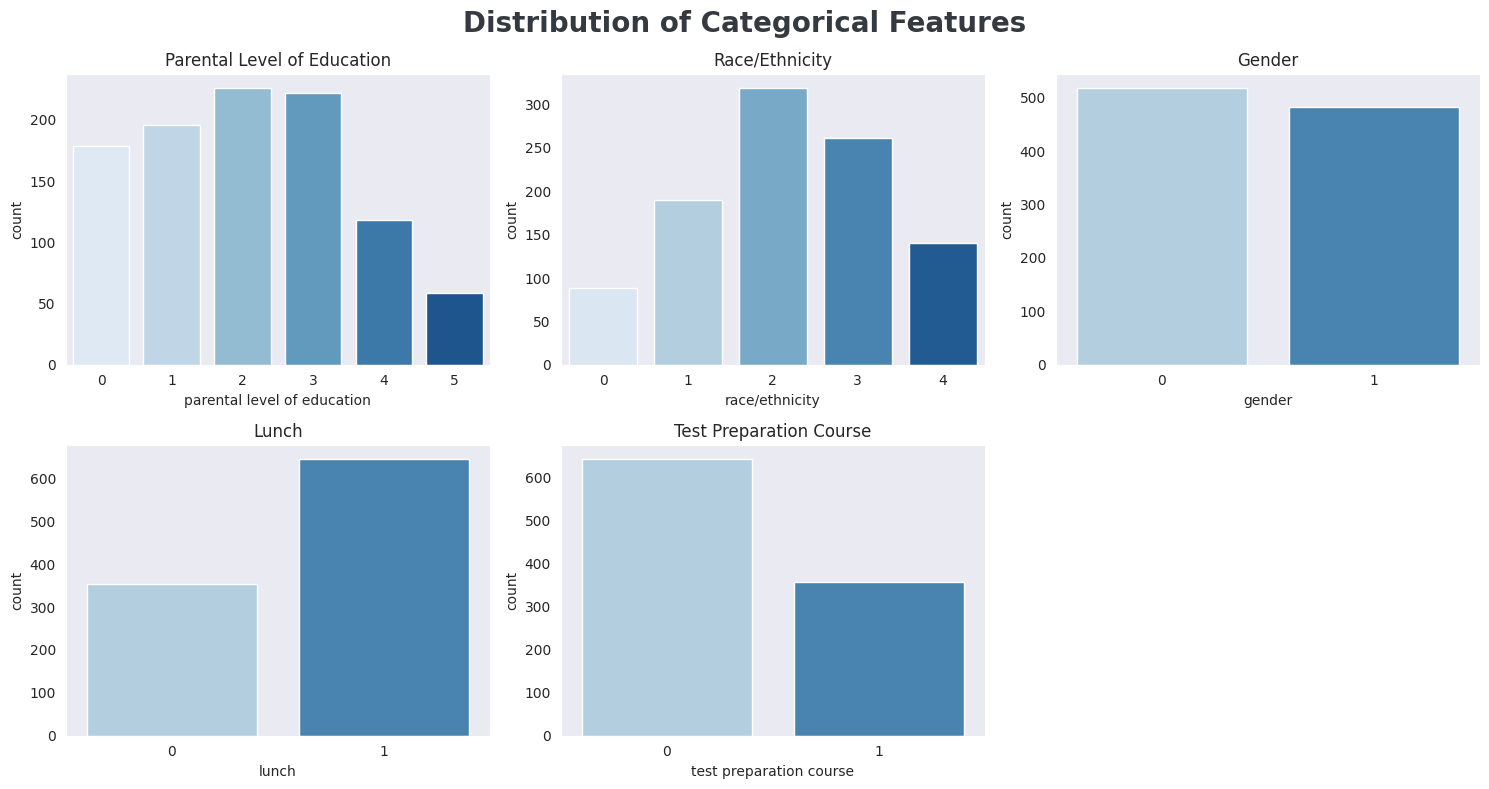

In [ ]:
# Catrgorical Features Distribution
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
axs=axs.flatten()

sns.countplot(data = df, x='parental level of education', palette='Blues', ax=axs[0])
axs[0].set_title("Parental Level of Education")

sns.countplot(data = df, x='race/ethnicity', palette='Blues', ax=axs[1])
axs[1].set_title("Race/Ethnicity")

sns.countplot(data = df, x='gender', palette='Blues', ax=axs[2])
axs[2].set_title("Gender")

sns.countplot(data = df, x='lunch', palette='Blues', ax=axs[3])
axs[3].set_title("Lunch")

sns.countplot(data = df, x='test preparation course', palette='Blues', ax=axs[4])
axs[4].set_title("Test Preparation Course")

axs[5].remove()

plt.suptitle("Distribution of Categorical Features",  fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()

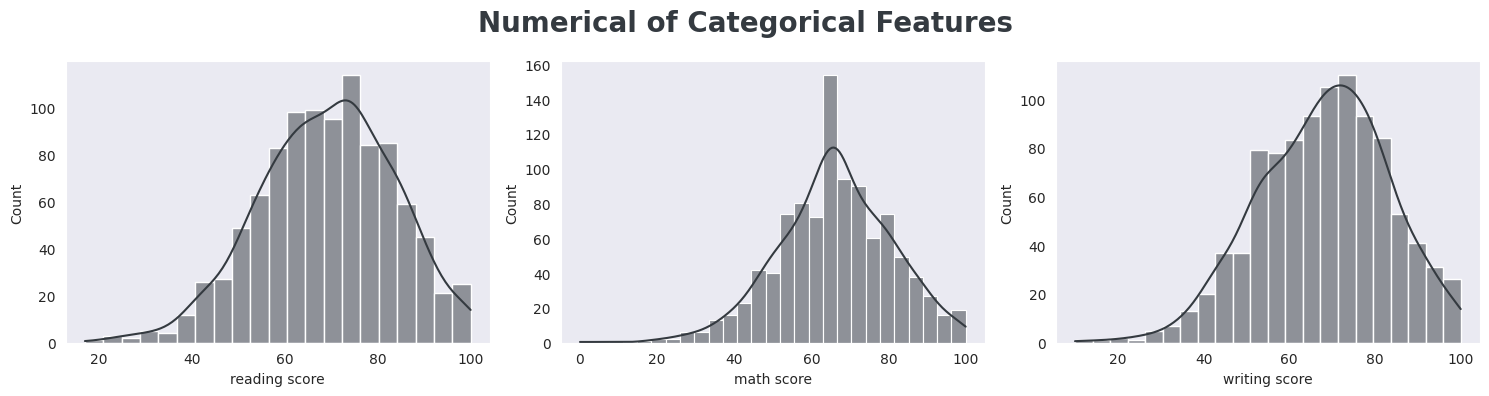

In [ ]:
# Numerical Features Distribution
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
axs=axs.flatten()

sns.histplot(data = df, x='reading score', kde=True,  color='#343A40', ax=axs[0])
sns.histplot(data = df, x='math score', kde=True, color='#343A40', ax=axs[1])
sns.histplot(data = df, x='writing score', kde=True, color='#343A40', ax=axs[2])

plt.suptitle("Numerical of Categorical Features",  fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()

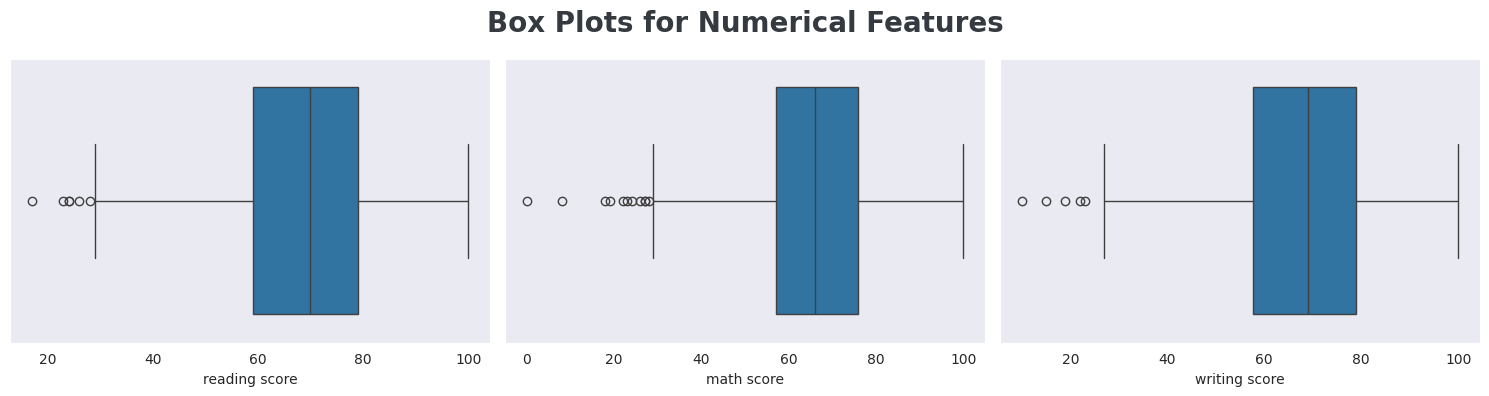

In [ ]:
# Box plots for numerical variables
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axs = axs.flatten()

sns.boxplot(data=df, x='reading score', ax=axs[0])
sns.boxplot(data=df, x='math score', ax=axs[1])
sns.boxplot(data=df, x='writing score', ax=axs[2])

plt.suptitle("Box Plots for Numerical Features", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()


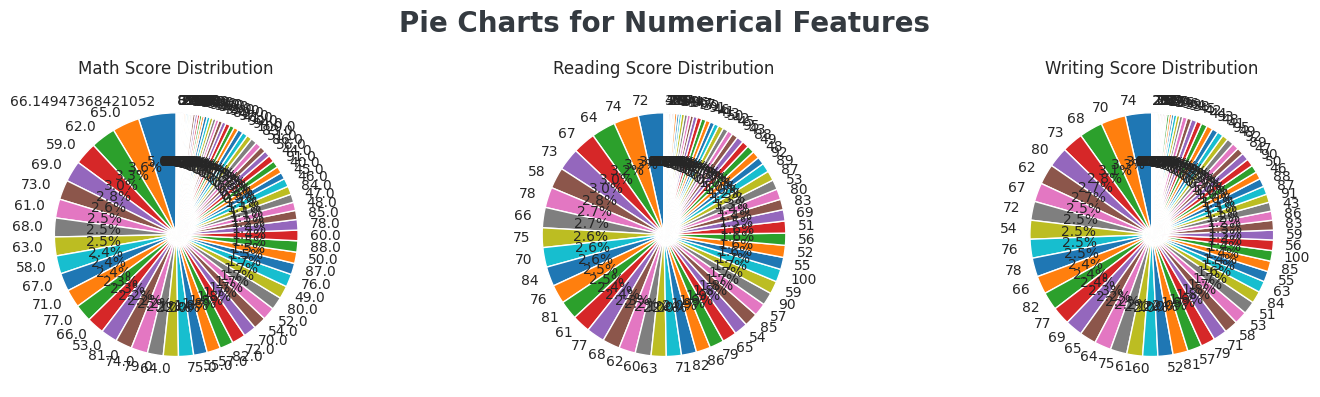

In [ ]:
# Pie chart for numerical variables in the same row
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axs = axs.flatten()

# Math Score
math_scores = df['math score'].value_counts()
axs[0].pie(math_scores.values, labels=math_scores.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Math Score Distribution")

# Reading Score
reading_scores = df['reading score'].value_counts()
axs[1].pie(reading_scores.values, labels=reading_scores.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Reading Score Distribution")

# Writing Score
writing_scores = df['writing score'].value_counts()
axs[2].pie(writing_scores.values, labels=writing_scores.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title("Writing Score Distribution")

plt.suptitle("Pie Charts for Numerical Features", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()


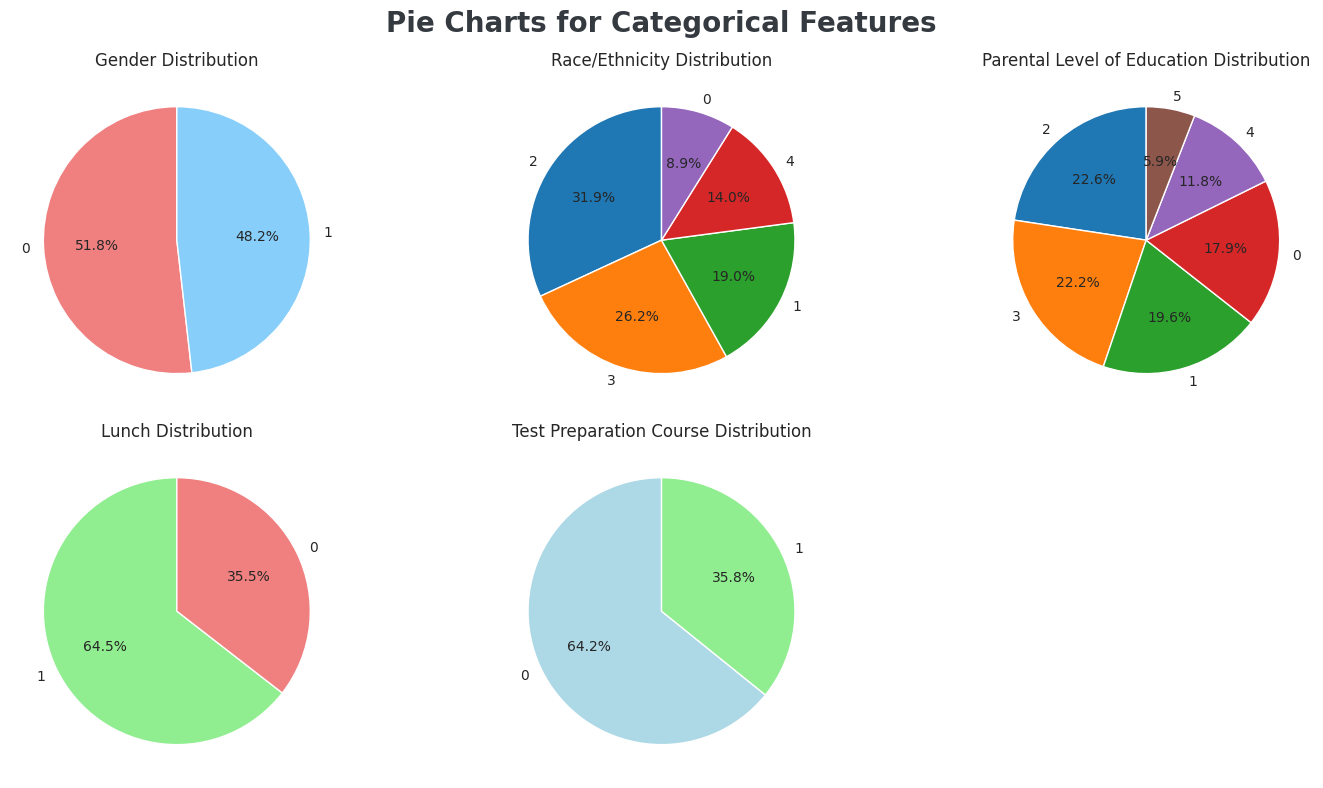

In [ ]:
# Pie chart for categorical variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()

# Gender
gender_counts = df['gender'].value_counts()
axs[0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
axs[0].set_title("Gender Distribution")

# Race/Ethnicity
race_ethnicity_counts = df['race/ethnicity'].value_counts()
axs[1].pie(race_ethnicity_counts.values, labels=race_ethnicity_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Race/Ethnicity Distribution")

# Parental Level of Education
parental_education_counts = df['parental level of education'].value_counts()
axs[2].pie(parental_education_counts.values, labels=parental_education_counts.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title("Parental Level of Education Distribution")

# Lunch
lunch_counts = df['lunch'].value_counts()
axs[3].pie(lunch_counts.values, labels=lunch_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
axs[3].set_title("Lunch Distribution")

# Test Preparation Course
test_prep_counts = df['test preparation course'].value_counts()
axs[4].pie(test_prep_counts.values, labels=test_prep_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
axs[4].set_title("Test Preparation Course Distribution")

axs[5].remove()

plt.suptitle("Pie Charts for Categorical Features", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()


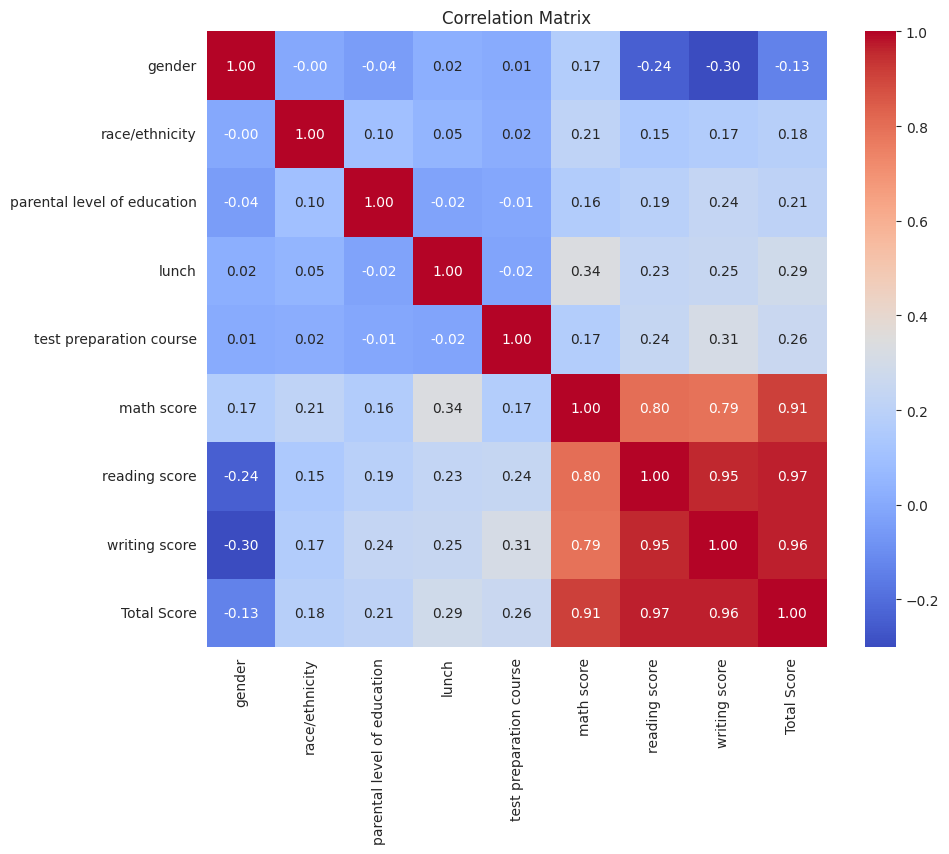

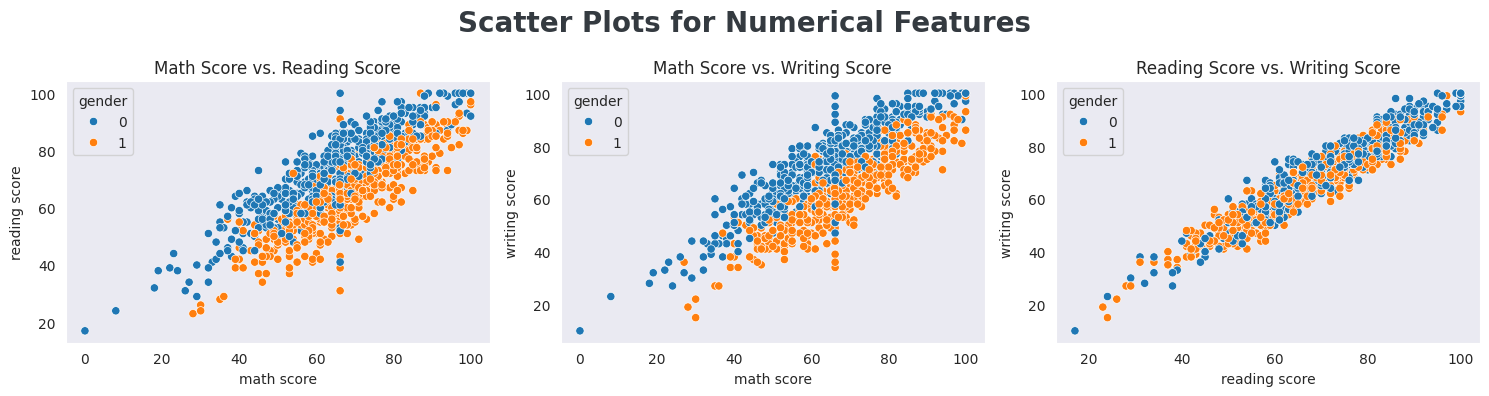

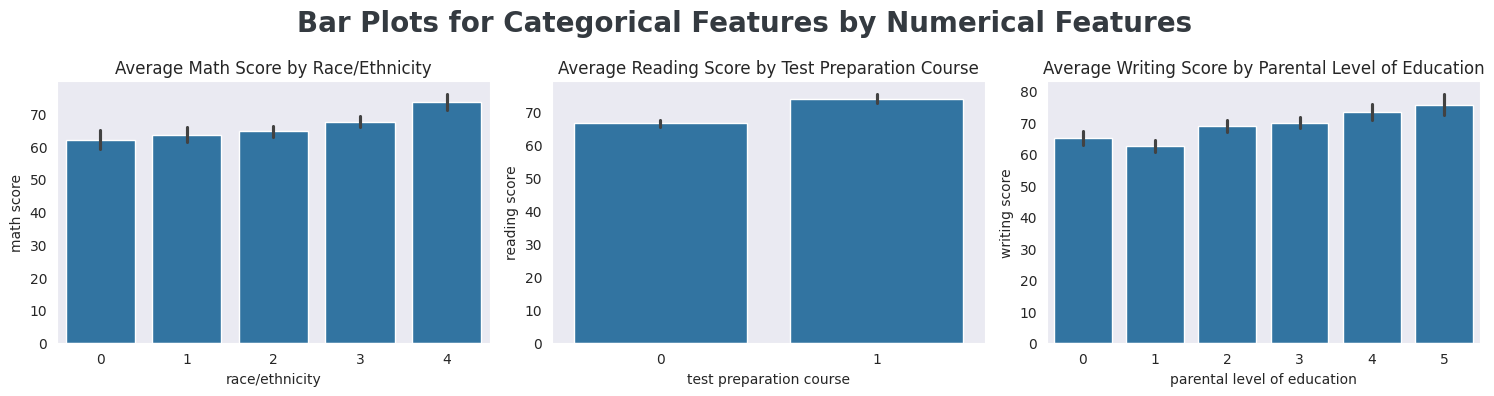

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for numerical variables
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axs = axs.flatten()

# Math Score vs. Reading Score
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', ax=axs[0])
axs[0].set_title("Math Score vs. Reading Score")

# Math Score vs. Writing Score
sns.scatterplot(data=df, x='math score', y='writing score', hue='gender', ax=axs[1])
axs[1].set_title("Math Score vs. Writing Score")

# Reading Score vs. Writing Score
sns.scatterplot(data=df, x='reading score', y='writing score', hue='gender', ax=axs[2])
axs[2].set_title("Reading Score vs. Writing Score")

plt.suptitle("Scatter Plots for Numerical Features", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()

# Bar plots for categorical variables by numerical variables
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axs = axs.flatten()

# Average Math Score by Race/Ethnicity
sns.barplot(data=df, x='race/ethnicity', y='math score', ax=axs[0])
axs[0].set_title("Average Math Score by Race/Ethnicity")

# Average Reading Score by Test Preparation Course
sns.barplot(data=df, x='test preparation course', y='reading score', ax=axs[1])
axs[1].set_title("Average Reading Score by Test Preparation Course")

# Average Writing Score by Parental Level of Education
sns.barplot(data=df, x='parental level of education', y='writing score', ax=axs[2])
axs[2].set_title("Average Writing Score by Parental Level of Education")

plt.suptitle("Bar Plots for Categorical Features by Numerical Features", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()


In [ ]:
# how to add new column in to dataframe
# creating a new features
df['Total Score'] = df['reading score'] + df['writing score'] + df['math score']

#if you need to get average value
df['Average Score'] = df['Total Score'] / 3

##**Home** **work** 😊

Kaggle Titanic Dataset: Link to Kaggle Titanic Dataset https://www.kaggle.com/c/titanic/data

1. Load the Titanic dataset and display the first 10 rows.
2. How many rows and columns are in the dataset? What are the data types of each column?
3. Identify which columns are numerical and which are categorical.
4. Calculate the mean, median, and mode for the Age and Fare columns.
5.What do the mean, median, and mode of the Age column tell you about the passengers?
6. Check for any missing data in the dataset. If there are missing values, fill them with appropriate substitutes (e.g., use the median to fill in missing Age values).
6. How many missing values are there in each column? How did you handle the missing values?
7. Perform EDA by summarizing key statistics about the passengers.
8. What is the distribution of passengers by class? How many passengers survived vs. didn’t survive?
10. Create at least two visualizations. For example, create a bar plot for survival rates and a histogram for the age distribution.
11. What insights can you draw from the visualizations? For example, is there a particular age group that had a higher survival rate?
12. Explore the relationship between Pclass (Passenger Class) and Survived using a cross-tabulation.
13. Does passenger class seem to affect the survival rate? What trends do you observe?
